<a href="https://colab.research.google.com/github/vmjs1234/CLUSTERING_ASSIGNMENT/blob/main/c)_gmm_clustering_breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gaussian Mixture Model (GMM) Clustering with the Breast Cancer Dataset


Gaussian Mixture Models (GMM) are a probabilistic model for representing normally distributed subpopulations within an overall population. This notebook demonstrates GMM clustering using the **Breast Cancer dataset** from Scikit-learn.


### Step 1: Import Necessary Libraries

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score
%matplotlib inline


### Step 2: Load and Explore the Breast Cancer Dataset

In [2]:

# Load the dataset
cancer = load_breast_cancer()
data = cancer.data
target = cancer.target
feature_names = cancer.feature_names

# Convert to DataFrame for easier manipulation
df = pd.DataFrame(data, columns=feature_names)
df['Target'] = target
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### Step 3: Preprocess the Data

In [3]:

# Select features for clustering
data_features = df.drop('Target', axis=1)

# Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_features)


### Step 4: Perform Gaussian Mixture Model Clustering

In [4]:

# Apply Gaussian Mixture Model clustering
gmm = GaussianMixture(n_components=2, random_state=42)
gmm_labels = gmm.fit_predict(data_scaled)

# Add GMM labels to the DataFrame
df['Cluster'] = gmm_labels


### Step 5: Visualize Clusters

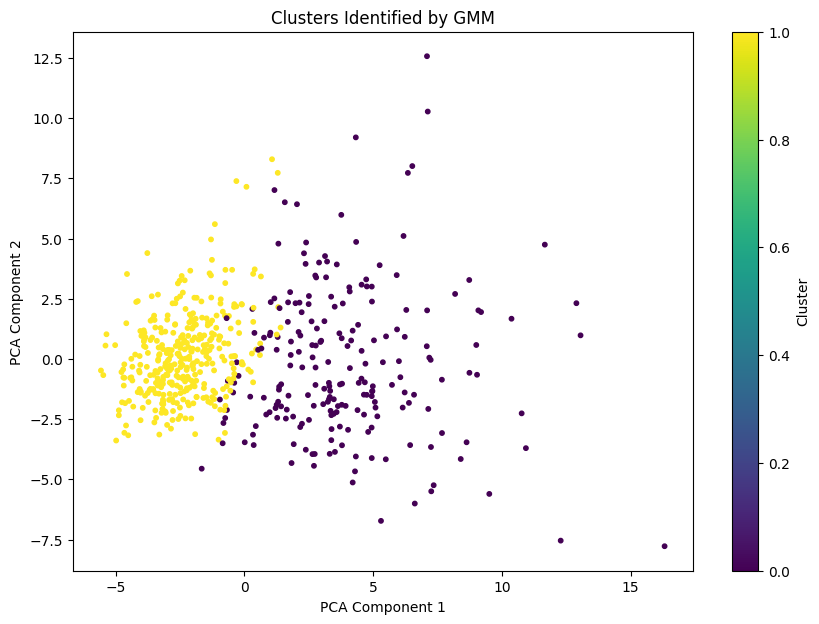

In [9]:

# Reduce dimensions using PCA for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Plot clusters
plt.figure(figsize=(10, 7))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=gmm_labels, cmap='viridis', s=10)
plt.title("Clusters Identified by GMM")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster')
plt.show()


### Step 6: Evaluate Clustering

In [6]:

# Compare GMM clustering with actual labels using Adjusted Rand Index
ari_score = adjusted_rand_score(target, gmm_labels)
print(f"Adjusted Rand Index (ARI): {ari_score:.2f}")


Adjusted Rand Index (ARI): 0.77


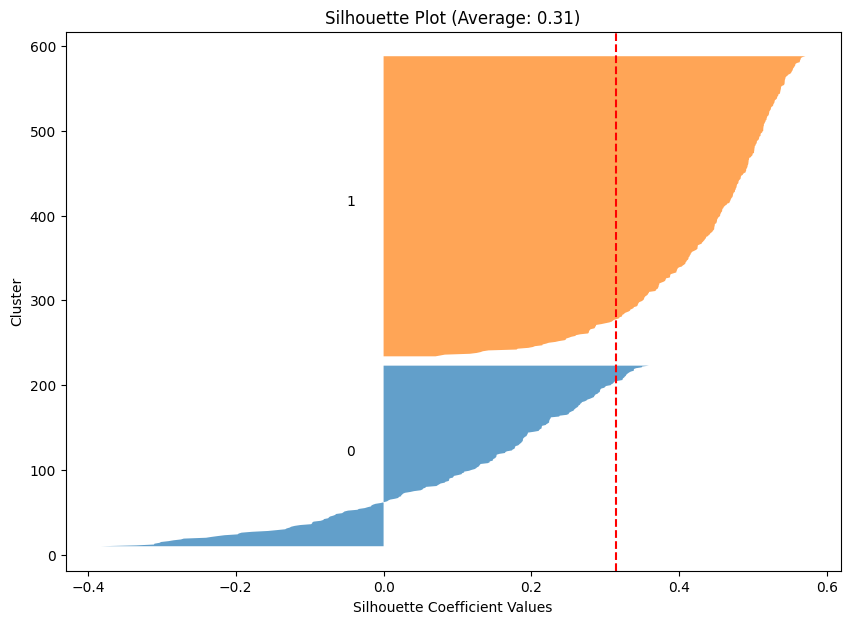

In [7]:
from sklearn.metrics import silhouette_samples, silhouette_score

# Compute silhouette scores for each sample
silhouette_vals = silhouette_samples(data_scaled, gmm_labels)
silhouette_avg = silhouette_score(data_scaled, gmm_labels)

# Plot silhouette scores
plt.figure(figsize=(10, 7))
y_lower = 10
for i in np.unique(gmm_labels):
    ith_cluster_silhouette_vals = silhouette_vals[gmm_labels == i]
    ith_cluster_silhouette_vals.sort()
    size_cluster = ith_cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_vals, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster, str(i))
    y_lower = y_upper + 10  # 10 for spacing between plots

plt.title(f"Silhouette Plot (Average: {silhouette_avg:.2f})")
plt.xlabel("Silhouette Coefficient Values")
plt.ylabel("Cluster")
plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.show()


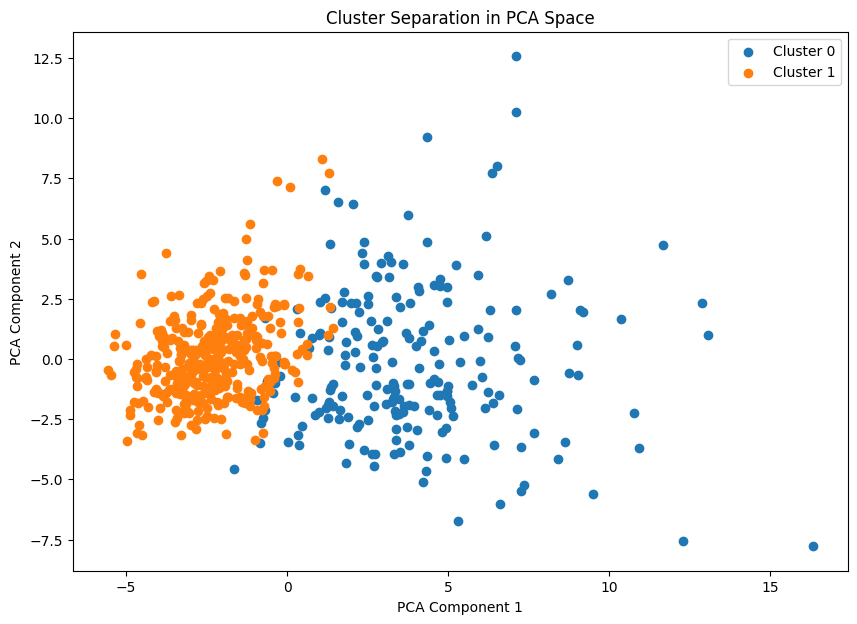

In [8]:
# Scatter plot for cluster separation in PCA-reduced space
plt.figure(figsize=(10, 7))
for cluster in np.unique(gmm_labels):
    cluster_data = data_pca[gmm_labels == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f"Cluster {cluster}")

plt.title("Cluster Separation in PCA Space")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()


### Conclusion


In this notebook, we:
1. Used the Breast Cancer dataset to demonstrate GMM clustering.
2. Preprocessed the data by scaling the features.
3. Applied Gaussian Mixture Models to identify clusters.
4. Visualized the clusters in reduced dimensions using PCA.
5. Evaluated the clustering performance using the Adjusted Rand Index (ARI).

Gaussian Mixture Models are powerful tools for clustering data, especially when clusters are not well-separated or spherical.
